In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
import numpy as np
import matplotlib.pyplot as plt
from feature_manager import FeatureManager
from classifier.lstm_classifier import LSTMClassifier
from random import randint
from visualizer import *

2023-01-17 23:44:15.327730: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-17 23:44:15.327830: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-17 23:44:15.327842: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [2]:
data = pd.read_csv("../data/BTCUSDT-1d.csv", parse_dates=["Open Time"], index_col = "Open Time")
fm = FeatureManager()
fm.build_feature(data=data,lags=1)

Train = 1269, Val = 271, Test = 273, All = 1813


2023-01-17 23:44:18.491826: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-01-17 23:44:18.491887: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: andy-GA-970A-D3
2023-01-17 23:44:18.491907: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: andy-GA-970A-D3
2023-01-17 23:44:18.492092: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 520.61.5
2023-01-17 23:44:18.492146: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 520.61.5
2023-01-17 23:44:18.492165: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 520.61.5


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24, 22)]          0         
                                                                 
 lstm (LSTM)                 (None, 50)                14600     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 14,651
Trainable params: 14,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200

Epoch 1: val_loss improved from inf to 0.72226, saving model to ../model_lstm_checkpoint.h5
125/125 - 7s - loss: 0.7457 - accuracy: 0.4583 - val_loss: 0.7223 - val_accuracy: 0.4597 - 7s/epoch - 56ms/step
Epoch 2/200

Epoch 2: val_loss improved from 0.72226 to 0.70602, saving model to ../model_lstm_checkpoin

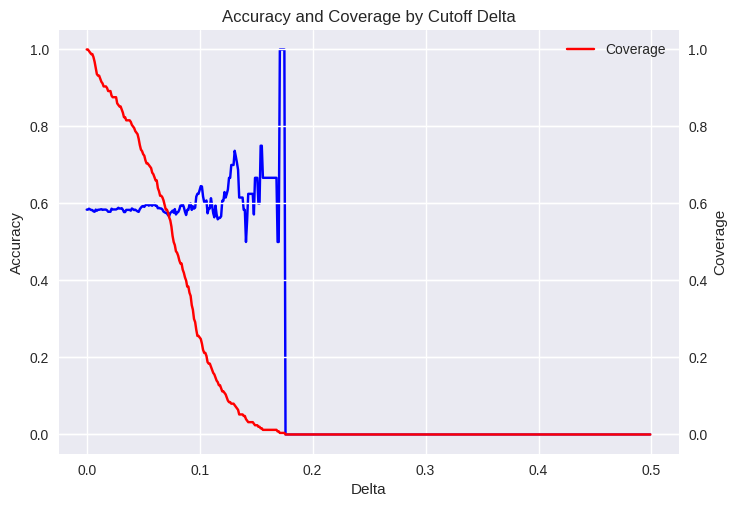

Data is none
Correct = 108, Predict = 182, All = 250 
Accuracy Score: 0.593, Coverage Score: 0.728


(0.5934065934065934, 0.728)

In [3]:
sequence_len = 24
sequence_stride = 1
sampling_rate = 1

model = LSTMClassifier()
model.prepare_dataset(
    data = fm.df,
    cols = fm.cols,
    target_col="dir",
    sequence_len=sequence_len,
    sequence_stride=sequence_stride,
    sampling_rate=sampling_rate
)

model.configure(hu = 50,shape=(sequence_len,len(fm.cols)))
model.run(gpu = True)

In [ ]:
pred_df = pd.DataFrame(model.pred_prob)
pred_df.describe()

In [ ]:
model.visualize_accuracy()